In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fetching pre-processed data
final_data_frame = pd.read_csv('..\\pre_processed_data\\200_ema\\GBPJPY_M30.csv')
final_data_frame = final_data_frame.drop('Unnamed: 0', axis=1)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
scaler.fit(final_data_frame)
normalised_df = scaler.transform(final_data_frame)

In [5]:
x = normalised_df[:, :-1]
y = normalised_df[:, -1] 

In [6]:
timesteps = 1
x_test = np.array(x).reshape(x.shape[0], x.shape[1], timesteps)


In [7]:
x_test.shape

(200000, 3, 1)

In [8]:
y_test = np.array(y).reshape(y.shape[0], 1, timesteps)

In [9]:
y_test.shape

(200000, 1, 1)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from sklearn.metrics import mean_absolute_error

In [11]:
model = keras.models.load_model('..\\models\\200_ema_30m.h5')

In [13]:
y_pred = model.predict(x_test[-500:])

16/16 [==============================] - 0s 5ms/step


In [14]:
yp = y_pred

In [19]:
scaler.inverse_transform(yp)

ValueError: non-broadcastable output operand with shape (500,1) doesn't match the broadcast shape (500,4)

In [16]:
yt = np.array(y_test[-500:]).reshape(y_test[-500:].shape[0], y_test[-500:].shape[2])

In [17]:
score = model.evaluate(x_test[-500:], y_test[-500:], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7436902523040771
Test accuracy: 0.5099999904632568


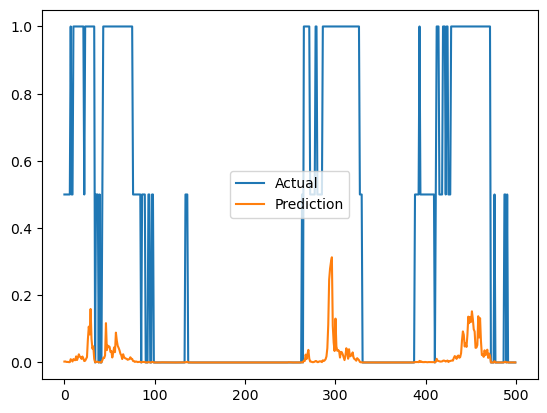

In [18]:
plt.plot(yt, label='Actual')
plt.plot(yp, label='Prediction')
plt.legend()
plt.show()